In [1]:
import tensorflow as tf
import numpy as np

In [5]:
filename = '/data/robotics/raw_position_images/train_2_' + '.tfrecords'


In [3]:
%matplotlib notebook
from matplotlib import pyplot as pl

In [15]:
example.features.feature.keys()

[u'x_y_pos', u'motor_pos', u'label', u'iminfo']

In [27]:

example = tf.train.Example()
pi = tf.python_io.tf_record_iterator(filename)
example.ParseFromString(pi.next())



img = np.fromstring(example.features.feature['iminfo'].bytes_list.value[0], dtype=np.uint8)[:640*480*3].reshape((480, 640, 3))

example.features.feature['label']

In [ ]:
dat = np.fromstring(example.features.feature["right_image"].bytes_list.value[0], dtype=np.uint8)

pl.imshow(dat.reshape((480, 640, 3)))

In [ ]:
from scipy.signal import convolve2d
from scipy.ndimage.filters import gaussian_filter


In [ ]:
example.features.feature['pos']

In [ ]:

def extract_endeff_pos(im):
    dfs = im - np.array([128, 0, 128])
    dfnrm = np.linalg.norm(dfs, axis=2)
    maxidx = np.argmax(gaussian_filter(np.exp(-0.01*dfnrm), 2))
    x, y = maxidx/640, maxidx%640
    return np.array((float(x),float(y)))

def extract_image(example, feature_name):
    dat = np.fromstring(example.features.feature[feature_name].bytes_list.value[0], dtype=np.uint8)
    return dat.reshape((480, 640, 3))
    
def extract_features(example):
    right_im = extract_image(example, "right_image")
    left_im = extract_image(example, "left_image")
    pos = np.array(example.features.feature['pos'].float_list.value)
    return np.concatenate([extract_endeff_pos(left_im), extract_endeff_pos(right_im),  pos])

In [ ]:
filename = '/data/robotics/raw_position_images/train.tfrecords'

pi = tf.python_io.tf_record_iterator(filename)

with open('/data/robotics/motors_to_camera/features', 'w') as f:
    for nxtexmpl in pi:
        example.ParseFromString(nxtexmpl)
        f.write(','.join([str(x) for x in extract_features(example)]))
        f.write('\n')

In [ ]:
inp = tf.Variable((None, 6))
W = 

In [ ]:
pl.imshow(im)

In [ ]:
pl.imshow(gaussian_filter(np.exp(-0.01*dfnrm), 2)[30:100, 300: 400])

In [ ]:
ls = [1,2,3,4, 5, 6, 7]
for c in ls:
    ls.remove(c)
ls

In [ ]:



dat = np.fromstring(example.features.feature["left_image"].bytes_list.value[0], dtype=np.uint8)
im = dat.reshape((480, 640, 3))
dfs = im - np.array([128, 0, 128])
dfnrm = np.linalg.norm(dfs, axis=2)
fig, ax = plt.subplots(figsize=(12, 12))
pl.imshow(np.exp(-0.01*dfnrm))



In [26]:
from matplotlib import pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.started = False
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.x_0 = None
        self.y_0 = None
        self.cidpress = self.line.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.line.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.line.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)
        
        
    def on_press(self, event):
        self.x_0 = event.xdata
        self.y_0 = event.ydata
        self.started = True
    
    def on_release(self, event):
        x_press, y_press = event.xdata, event.ydata
        self.started = False
        self.draw_box(event)
        
    def draw_box(self, event):
        self.x_press, self.y_press = event.xdata, event.ydata
        self.xs = [self.x_0, self.x_press, self.x_press, self.x_0, self.x_0]
        self.ys = [self.y_0, self.y_0, self.y_press, self.y_press, self.y_0]
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()
    
    def on_motion(self, event):
        if not self.started:
            return
        if np.random.random() < 0.25:
            self.draw_box(event)



In [39]:
outfile = '/data/robotics/annotated_images/'
writer = tf.python_io.TFRecordWriter(outfile)

In [38]:

example = tf.train.Example()
pi = tf.python_io.tf_record_iterator(filename)


In [11]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[int(value)]))


In [40]:
writer = tf.python_io.TFRecordWriter('/data/robotics/endaffector_annotated.tfrecords')

<IPython.core.display.Javascript object>


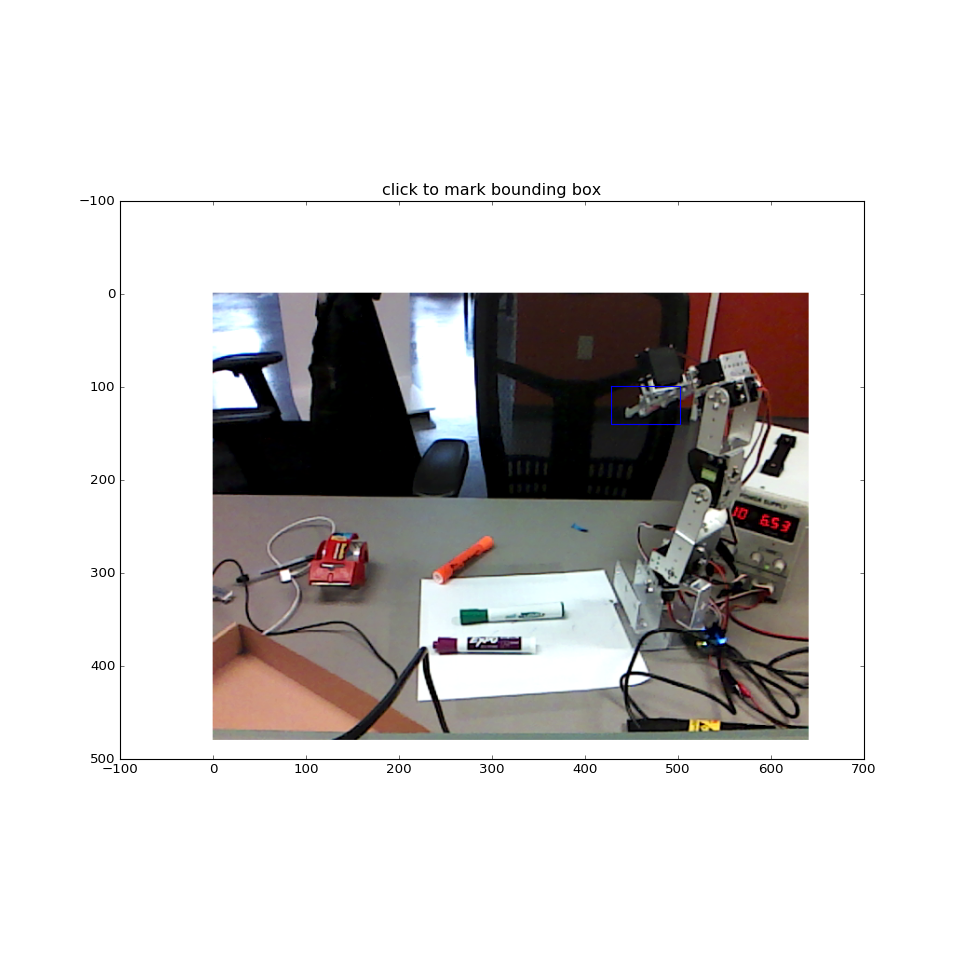

In [41]:
fig, ax = plt.subplots(figsize=(12, 12))
example.ParseFromString(pi.next())
im = np.fromstring(example.features.feature['iminfo'].bytes_list.value[0], dtype=np.uint8)[:640*480*3].reshape((480, 640, 3))
ax.imshow(im)
ax.set_title('click to mark bounding box')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)
plt.show()

In [186]:
x_min, y_min, x_max, y_max = linebuilder.x_0, linebuilder.y_0, linebuilder.x_press, linebuilder.y_press

label = example.features.feature['label']
iminfo = example.features.feature['iminfo']
example_out = tf.train.Example(features=tf.train.Features(feature={
                'label': example.features.feature['label'],
                'iminfo': example.features.feature['iminfo'],
                'x_min':_int64_feature(x_min),
                    'y_min':_int64_feature(y_min),
                    'x_max':_int64_feature(x_max),
                    'y_max':_int64_feature(y_max),
                }))
writer.write(example_out.SerializeToString())
            



fig, ax = plt.subplots(figsize=(8, 8))
example.ParseFromString(pi.next())
im = np.fromstring(example.features.feature['iminfo'].bytes_list.value[0], dtype=np.uint8)[:640*480*3].reshape((480, 640, 3))
ax.imshow(im)
ax.set_title('click to mark bounding box')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)
plt.show()

<IPython.core.display.Javascript object>

DataLossError: truncated record at 801808965

In [190]:
import cv2
import json
pi = tf.python_io.tf_record_iterator("/data/robotics/endaffector_annotated.tfrecords")
idx = 0
# example.ParseFromString(pi.next())
for feature_data in pi:
    example.ParseFromString(feature_data)
    img_file_name = "/data/robotics/armpos/images/%d.jpg"%idx
    attribute_file_name = "/data/robotics/armpos/annotations/%d.json"%idx
    box_pos = dict([(x, example.features.feature[x].int64_list.value[0]) for x in ["y_max", "y_min",
                                                                "x_max", "x_min"]])
    box_pos["label"] = "armpos"
    with open(attribute_file_name,'w') as f:
        json.dump(box_pos, f)
    im = np.fromstring(example.features.feature['iminfo'].bytes_list.value[0], dtype=np.uint8)[:640*480*3].reshape((480, 640, 3))
    cv2.imwrite(img_file_name, im)
    idx+=1


In [191]:
idx


145

In [187]:
cv2.imwrite('/tmp/test.jpg', im)